# Cluster Analysis Lyrics_tfidf

In [2]:
import pickle
import pandas as pd
import numpy as np

In [3]:
from sklearn.externals import joblib
from sklearn.metrics import *
from sklearn.preprocessing import *
from numpy import random
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt
from __future__ import print_function
import matplotlib.cm as cm
%matplotlib inline

In [7]:
save_load_path = '/home/eolus/Dropbox/MA755 Public/pynotes/Danny-Eole-Yuchen/Pickles'
#save_load_path = '/Users/YuchenZhou/Dropbox (Personal)/MA755 Public/pynotes/Danny-Eole-Yuchen/Pickles'
np_tfidf = np.load(save_load_path+'/lyrics_english_tfidf_matrix.npy')
np_tfidf
#np_tfidf_scaled = scale(np_tfidf) # standardize data
#np_tfidf_normalized = normalize(np_tfidf)
df_tfidf = pd.DataFrame(np_tfidf)
df_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_tfidf.describe()

,0,1,2,3,4,5,6,7,8,9,...,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393
count,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,...,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000
mean,0.000117,0.000651,0.001553,0.000467,0.006138,0.000286,0.000380,0.000386,0.001092,0.000476,...,0.000828,0.000290,0.001232,0.000271,0.000111,0.000082,0.000095,0.000090,0.000363,0.000350
std,0.005186,0.011320,0.017824,0.010685,0.031158,0.007360,0.010427,0.008960,0.016396,0.009072,...,0.014017,0.009140,0.013474,0.006991,0.004961,0.003641,0.004243,0.004004,0.009364,0.008989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.230750,0.256748,0.289661,0.283672,0.365603,0.200947,0.378843,0.280170,0.309840,0.224774,...,0.287546,0.297123,0.280050,0.196793,0.220731,0.161993,0.188805,0.178167,0.267472,0.239889


Run cluster analysis, with the number of cluster ranging from 2 to 20

In [10]:
k_range=range(2,20)
k_means_var=[KMeans(n_clusters=k, random_state=10).fit(df_tfidf) for k in k_range]
centroids=[X.cluster_centers_ for X in k_means_var]

Calculate Euclidean distance, WCSS, TSS and BSS.

- WCSS(within cluster sum of squares): the total distance of data points from their respective cluster centroids

- AWSS(average within cluster sum of squares): the average distance of data points from their respective cluster centroids

- BSS(between cluster sum of squares): total distance of various cluster centroids to the global mean of data

- TSS(total sum of squares): total distance of data points from global mean of data, for a given dataset tss is going to be constant

-  Rsq, i.e. BSS/TSS, is the total variance explained by clustering

we expect WCSS to be lower and BSS to be higher, thus we should select the iteration with maximum BSS/TSS

In [11]:
# calculate pairwise distances between clusters
D_k = [cdist(df_tfidf, cent, 'euclidean') for cent in centroids]

# returns the smallest euclidean distance between clusters
dist = [np.min(D,axis=1) for D in D_k]

AWSS = [sum(d)/df_tfidf.shape[0] for d in dist]
WCSS = [sum(d**2) for d in dist]
TSS = sum(pdist(df_tfidf)**2)/df_tfidf.shape[0]
BSS = TSS-WCSS
Rsq = BSS/TSS

In [12]:
AWSS

[0.97824348295023045,
 0.97632827207416151,
 0.97501999119168858,
 0.97415932894670099,
 0.97343653602382607,
 0.97303068290882089,
 0.97243842999069963,
 0.97210913506958474,
 0.97163830829610454,
 0.97126639214216126,
 0.97105787240436714,
 0.97036212595745186,
 0.97044212314841971,
 0.9702262812516238,
 0.96978307504047101,
 0.9694234621426,
 0.96952979515533733,
 0.96910610034449629]

In [13]:
WCSS

[1895.7212599755223,
 1888.3992409446262,
 1883.4174176159936,
 1880.1068406548452,
 1877.3265291249745,
 1875.7697091763416,
 1873.4837951422439,
 1872.2097964519905,
 1870.4119215929804,
 1869.0156946988373,
 1868.1885067039893,
 1865.4761290778411,
 1865.793714906582,
 1864.9621103124853,
 1863.2489492762641,
 1861.921342655246,
 1862.2955765552426,
 1860.6411594907909]

In [14]:
TSS

1904.3620095951019

In [15]:
BSS

array([  8.64074962,  15.96276865,  20.94459198,  24.25516894,
        27.03548047,  28.59230042,  30.87821445,  32.15221314,
        33.950088  ,  35.3463149 ,  36.17350289,  38.88588052,
        38.56829469,  39.39989928,  41.11306032,  42.44066694,
        42.06643304,  43.7208501 ])

In [17]:
Rsq*100

array([ 0.45373461,  0.83822133,  1.09982198,  1.27366377,  1.41966078,
        1.50141099,  1.62144667,  1.68834565,  1.7827539 ,  1.8560712 ,
        1.89950769,  2.04193742,  2.02526066,  2.06892907,  2.15888891,
        2.2286029 ,  2.20895149,  2.29582663])

## Elbow curve

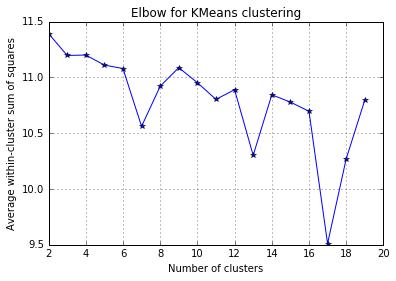

In [77]:
fig = plt.figure() #create a figure contain all the plots
ax = fig.add_subplot(111)
ax.plot(k_range, AWSS, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

## Variance Explained vs K

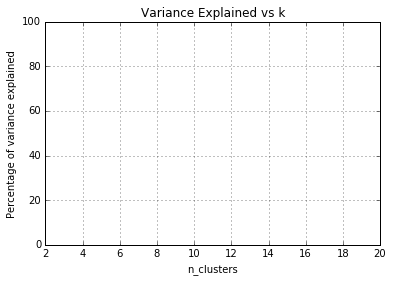

In [78]:
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, Rsq*100, 'b*-') 
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('n_clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Variance Explained vs k')

## Silhouette Coefficient vs k

In [79]:
s=[silhouette_score(df_tfidf, X.labels_, metric = 'minkowski', random_state=10) for X in k_means_var]   
plt.plot(s)
plt.grid(True)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette Score vs K")

KeyboardInterrupt: 

In [ ]:
output_path = '/Users/YuchenZhou/Dropbox (Personal)/MA755 Public/pynotes/Danny-Eole-Yuchen/Pickles/Clustering/Data output/'
#choose the number of clusters, 6
num_clusters = 6

km = KMeans(n_clusters=num_clusters, random_state=10)

%time km.fit(df_tfidf)

#dump the cluster into pickle file and load
joblib.dump(km, output_path+'cluster_lyrics_tfidf419.pkl')

km = joblib.load(output_path + 'cluster_lyrics_tfidf419.pkl')

predict = km.fit_predict(np_tfidf)

In [ ]:
#add cluster index as 'cluster' column to the dataframe
df_tfidf['cluster']= predict

In [ ]:
df_tfidf.head()

In [ ]:
#group by cluster index and compute the mean for each cluster on each column
df_grouped = df_tfidf.groupby(df_tfidf['cluster'])
df_grouped.mean()

In [ ]:
df_grouped['cluster'].count()

## Silhouette Coefficient Analysis

In [ ]:
print(__doc__)

In [ ]:
y = km.labels_
X = np_tfidf
range_n_clusters=[2,3,4,5,6,7,8]

In [ ]:
y = km.labels_
X = np_tfidf
range_n_clusters=[2,3,4,5,6,7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 0.1]
    ax1.set_xlim([-0.02,0.04])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.02, 0, 0.02, 0.04])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.set_ylim([-0.002, 0.002])
    ax2.set_xlim([-0.002, 0.002])
    ax2.set_xticks([ -0.002,0,0.002])
    ax2.set_yticks([ -0.002,0,0.002])

    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

Reference:

http://www.pybloggers.com/grouping-nba-players/

http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#example-cluster-plot-kmeans-silhouette-analysis-py